# **Premier League Player Sale Predictor**

This notebook shows the code needed to produce a predictor of whether a Premier League player should be sold based on his stats in the previous season.

In [3]:
## importing every package needed for a logistic regression
import seaborn as sns 
import matplotlib.pyplot as plt 

import pandas as pd 
import numpy as np 
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
## reading in the csv file
df = pd.read_csv('england-premier-league-players-2018-to-2019-stats.csv')

In [5]:
## Checking the first few rows of the dataframe
df.head()

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,assists_overall,assists_home,assists_away,penalty_goals,penalty_misses,clean_sheets_overall,clean_sheets_home,clean_sheets_away,conceded_overall,conceded_home,conceded_away,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer
0,Aaron Cresswell,31,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,701,England,20,11,9,0,0,0,1,1,0,0,0,3,2,1,22,12,10,1,0,0.06,0.06,0.00,0.00,0.00,0,1.25,72,79,1589,1589,0.06,290,191,80,20
1,Aaron Lennon,33,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,730,England,16,7,9,1,1,0,1,1,0,0,0,4,2,2,20,8,12,1,0,0.15,0.07,0.07,0.18,0.00,1217,1.48,61,76,1217,1217,0.07,196,187,-1,10
2,Aaron Mooy,30,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,1137,Australia,29,15,14,3,1,2,1,0,1,1,0,4,3,1,46,20,26,4,0,0.15,0.04,0.12,0.08,0.16,776,1.78,51,80,582,2327,0.15,144,233,-1,3
3,Aaron Ramsey,30,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,638,Wales,28,14,14,4,2,2,6,5,1,0,0,7,6,1,12,2,10,0,0,0.68,0.41,0.27,0.26,0.28,332,0.81,111,47,0,221,0.00,69,8,-1,5
4,Aaron Rowe,20,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,55,England,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.00,0.00,0.00,0.00,0.00,0,1.30,69,35,0,0,0.00,-1,-1,-1,31


In [6]:
## Creating a new binary column in the dataframe called 'Sold or not'
## 1 indicates that the person was sold, a 0 indicates otherwise
df['Sold or not'] = 0

# Players Sold function

In [7]:

def players_sold(full_name):
  
  """ a function that fills in the 'Sold or not' column with a 1 if the name is in the list below, as these players were sold in the following year.
  if the player's name is not in the list, then the 'Sold or not' column will be filled with a 0"""

  if full_name in ['Aaron Ramsey', 'Petr Čech', 'Danny Welbeck', 'Laurent Koscielny', 
                   'Alex Iwobi', 'Carl Jenkinson','Nacho Monreal', 'Stephan Lichtsteiner', 'Miguel Ángel Britos Cabrera', 
                   'Marvin Zeegelaar', 'Tommie Hoban', 'Sam Howes', 'Tom Leighton', 'Sulayman Marreh', 
                   'Michael Mullings', 'Obbi Oularé', 'Kai Sanders', 'Dodi Lukebakio', 'Tyler Brown', 'Will Donkin', 'Bivesh Gurung', 'Joseph Hungbo', 'Levi Lumeka', "Oliver O'Dwyer", 
                  'Jason Puncheon', 'Bakary Sako', "Pape N'Diaye Souaré", 'Julián Speroni', 'Aaron Wan-Bissaka', 
                   'Mohamed Diamé', 'Ayoze Perez', 'José Luis Sanmartín Mato', 'Marc Pugh', 'James Boote', 
                   'Nathan Clements', 'Jordan Holmes', 'Tom Parker-Trott', 'Tyrone Mings','Connor Mahoney', 'Lys Mousset', 
                   'Anders Lindegaard', 'Peter Crouch', 'Jonathan Walters', 'Stephen Ward', 'Tom Heaton', 'Steven Davis', 
                   'Jonathan Afolabi', 'Jake Flannigan', 'Ben Rowthorn', 'Jamie Bradley-Green', 'Siph Mdlalose', 'Jordan Araujo', 
                   'Ben Barclay', 'George Bentley', 'Bruno Saltor Grau', 'Julien Carre', 'Will Collar', 
                  'Billy Collings', 'Ben Hall', 'Josh Kerr', 'Stefan Ljubicic', 'Aleš Matějů', 'Owen Moore', 'Joe Tomlinson',
                 'Richie Towell', 'Matthew Weaire', 'Piotr Zalewski', 'Cameron Tutt', 'Markus Suttner', 'Tomer Hemed', 
                   'Jordan Duffey', 'Tyrone Duffus', 'Aron Einar Gunnarsson', 'Kadeem Harris', 'Jack McKay', 'Brian Murphy', 
               "Stuart O'Keefe", 'Adam Sharif', 'Henry Smith', 'Rhys Healey', 'Bruno Écuélé Manga', 'Kenneth Dahrup Zohorè', 
               'Loïc Damour', 'Showkat Ali Tahir', 'Elijah Adebayo', 'Scott Armsworth', 'Robert Atkinson', 'Ryan Guno Babel', 
                   'Aron Davies', 'José Garrido', 'Mattias Käit', 'Chris Kelly', 'Lazar Marković', 'Berti Schötterl', 
                   'Jón Dagur Þorsteinsson', 'Erick Kenko', 'Harvey Elliot', 'Ryan Sessegnon', 'Rui Fonte', 'Marcelo Djaló',
                  'Chris Löwe', 'Laurent Depoitre', 'Erik Durm', 'Jonas Lössl', 'Jack Payne', 'Daniel Williams', 'Tom Smith',
               'Philip Billing', 'Mathias Jattah-Njie Jørgensen', 'Abdelhamid Sabiri', 'Rajiv van La Parra']:
    return 1
  else:
    return 0

In [9]:
## Updating the 'Sold or not' column using the players_sold function and applying it to the 'full_name' column in the dataframe
df['Sold or not'] = df['full_name'].apply(players_sold)

In [10]:
## Doing a value count to ensure the function worked as expected
df['Sold or not'].value_counts()

0    524
1     48
Name: Sold or not, dtype: int64

# Logistic Regression

In [11]:
## Starting a Logistic Regression --> Setting our Y value as the 'Sold or not' column
Y = df['Sold or not']

In [12]:
## Making a list of all the columns in the data frame
df.columns

Index(['full_name', 'age', 'birthday', 'birthday_GMT', 'league', 'season',
       'position', 'Current Club', 'minutes_played_overall',
       'minutes_played_home', 'minutes_played_away', 'nationality',
       'appearances_overall', 'appearances_home', 'appearances_away',
       'goals_overall', 'goals_home', 'goals_away', 'assists_overall',
       'assists_home', 'assists_away', 'penalty_goals', 'penalty_misses',
       'clean_sheets_overall', 'clean_sheets_home', 'clean_sheets_away',
       'conceded_overall', 'conceded_home', 'conceded_away',
       'yellow_cards_overall', 'red_cards_overall',
       'goals_involved_per_90_overall', 'assists_per_90_overall',
       'goals_per_90_overall', 'goals_per_90_home', 'goals_per_90_away',
       'min_per_goal_overall', 'conceded_per_90_overall',
       'min_per_conceded_overall', 'min_per_match', 'min_per_card_overall',
       'min_per_assist_overall', 'cards_per_90_overall',
       'rank_in_league_top_attackers', 'rank_in_league_top_midfie

In [13]:
## Using trial and error to choose the appropriate columns for the Logistic Regression's Feature Columns
## Any columns that are commented out were initially used for a Logistic Regression, but then removed to improve it

feature_cols = ['age',
                'minutes_played_overall',
                #'appearances_overall',
                'goals_overall',
                'assists_overall',
                #'clean_sheets_overall',
                'conceded_overall',
                #'red_cards_overall',
                'rank_in_league_top_attackers',
                #'rank_in_league_top_midfielders',
                # 'rank_in_league_top_defenders',
                'rank_in_club_top_scorer'
                ]


X = df[feature_cols]

## As with linear regression, we need to manually add the constant - this is the alpha term! 
X = sm.add_constant(X)

In [14]:
lr = sm.Logit(Y, X).fit() ## Create and fit the model

lr.summary() ## Creating a summary of the model

lr.k_constant

Optimization terminated successfully.
         Current function value: 0.249983
         Iterations 8


1

In [15]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Sold or not   No. Observations:                  572
Model:                          Logit   Df Residuals:                      564
Method:                           MLE   Df Model:                            7
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.1327
Time:                        14:30:07   Log-Likelihood:                -142.99
converged:                       True   LL-Null:                       -164.87
Covariance Type:            nonrobust   LLR p-value:                 2.383e-07
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -6.4260      1.095     -5.868      0.000      -8.573      -4.280
age                              0.1384      0.035      3.960      0.000       0.070       0.207
minutes_played_overall          -0.0016      0.001     -2.811      0.005      -0.003      -0.000
goals_overall                   -0.0936      0.109     -0.858      0.391      -0.307       0.120
assists_overall                  0.1101      0.115      0.961      0.337      -0.115       0.335
conceded_overall                 0.0902      0.028      3.253      0.001       0.036       0.145
rank_in_league_top_attackers    -0.0034      0.002     -1.989      0.047      -0.007   -5.05e-05
rank_in_club_top_scorer          0.0517      0.022      2.299      0.022       0.008       0.096
================================================================================================
"""

In [16]:
## Creating a column to show the binary prediction based on the Logistic Regression
df['prediction'] = lr.predict(X)

In [17]:
## Checking the prediction column for the dataframe
df.head(10)

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,assists_overall,assists_home,assists_away,penalty_goals,penalty_misses,clean_sheets_overall,clean_sheets_home,clean_sheets_away,conceded_overall,conceded_home,conceded_away,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,Sold or not,prediction
0,Aaron Cresswell,31,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,701,England,20,11,9,0,0,0,1,1,0,0,0,3,2,1,22,12,10,1,0,0.06,0.06,0.00,0.00,0.00,0,1.25,72,79,1589,1589,0.06,290,191,80,20,0,0.078485
1,Aaron Lennon,33,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,730,England,16,7,9,1,1,0,1,1,0,0,0,4,2,2,20,8,12,1,0,0.15,0.07,0.07,0.18,0.00,1217,1.48,61,76,1217,1217,0.07,196,187,-1,10,0,0.111180
2,Aaron Mooy,30,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,1137,Australia,29,15,14,3,1,2,1,0,1,1,0,4,3,1,46,20,26,4,0,0.15,0.04,0.12,0.08,0.16,776,1.78,51,80,582,2327,0.15,144,233,-1,3,0,0.096093
3,Aaron Ramsey,30,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,638,Wales,28,14,14,4,2,2,6,5,1,0,0,7,6,1,12,2,10,0,0,0.68,0.41,0.27,0.26,0.28,332,0.81,111,47,0,221,0.00,69,8,-1,5,1,0.050157
4,Aaron Rowe,20,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,55,England,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.00,0.00,0.00,0.00,0.00,0,1.30,69,35,0,0,0.00,-1,-1,-1,31,0,0.112223
5,Aaron Wan-Bissaka,23,880502400,1997/11/26,Premier League,2018/2019,Midfielder,Crystal Palace,3135,1605,1530,England,35,18,17,0,0,0,3,1,2,0,0,12,7,5,41,17,24,5,1,0.09,0.09,0.00,0.00,0.00,0,1.18,76,90,523,1045,0.17,312,160,-1,22,1,0.017872
6,Abdelhamid Sabiri,24,849139200,1996/11/28,Premier League,2018/2019,Midfielder,Huddersfield Town,49,0,49,Morocco,2,0,2,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0.00,0.00,0.00,0.00,0.00,0,5.51,16,25,0,0,0.00,-1,-1,-1,22,1,0.145734
7,Abdoulaye Doucouré,28,725846400,1993/01/01,Premier League,2018/2019,Midfielder,Watford,3062,1566,1496,France,35,18,17,5,3,2,6,2,4,0,0,5,3,2,54,27,27,7,0,0.32,0.18,0.15,0.17,0.12,612,1.59,57,87,437,510,0.21,124,80,-1,5,0,0.083038
8,Aboubakar Kamara,26,794534400,1995/03/07,Premier League,2018/2019,Forward,Fulham,687,468,219,France,13,8,5,3,1,2,0,0,0,1,1,2,1,1,16,9,7,2,0,0.39,0.00,0.39,0.19,0.82,229,2.10,43,53,344,0,0.26,38,412,-1,4,0,0.065784
9,Adalberto Peñaranda Maestre,23,865036800,1997/05/31,Premier League,2018/2019,Forward,Watford,0,0,0,Venezuela,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,0,0.00,-1,-1,-1,-1,0,0.035886


# Confusion Matrix

In [23]:
from sklearn.metrics import (confusion_matrix, accuracy_score) 
def produce_confusion(positive_label, negative_label, cut_off, df, y_pred_name, y_real_name):
## positive label --> y = 1 class
## negative label --> y = 0 class

    #Set pred to 0 or 1 depending on whether it's higher than the cut_off point.
    df['pred_binary'] = np.where(df[y_pred_name] > cut_off , 1, 0)
    
    #Build the CM
    cm = confusion_matrix(df[y_real_name], df['pred_binary'])  
    
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g'); 

    # labels, title, ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('Real labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([negative_label, positive_label])
    ax.yaxis.set_ticklabels([negative_label, positive_label]);

    print('Test accuracy = ', accuracy_score(df[y_real_name], df['pred_binary']))

Test accuracy =  0.8321678321678322


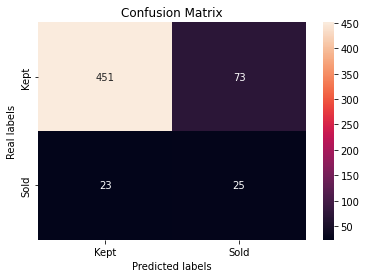

In [24]:
## Using the produce_confusion function to produce a confusion matrix with a test accuracy
## A user-defined cut off point was determined through trial and error
produce_confusion('Sold', 'Kept', 0.14 , df, 'prediction', 'Sold or not')

In [26]:
## Using a cut off point, a new column was created to convert the predictions into a binary value
cut_off = 0.05
df['pred_binary'] = np.where(df['prediction'] > cut_off , 1, 0)

In [29]:
df.head(10)

,full_name,age,birthday,birthday_GMT,league,season,position,Current Club,minutes_played_overall,minutes_played_home,minutes_played_away,nationality,appearances_overall,appearances_home,appearances_away,goals_overall,goals_home,goals_away,assists_overall,assists_home,assists_away,penalty_goals,penalty_misses,clean_sheets_overall,clean_sheets_home,clean_sheets_away,conceded_overall,conceded_home,conceded_away,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,goals_per_90_home,goals_per_90_away,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,rank_in_league_top_attackers,rank_in_league_top_midfielders,rank_in_league_top_defenders,rank_in_club_top_scorer,Sold or not,prediction,pred_binary
0,Aaron Cresswell,31,629683200,1989/12/15,Premier League,2018/2019,Defender,West Ham United,1589,888,701,England,20,11,9,0,0,0,1,1,0,0,0,3,2,1,22,12,10,1,0,0.06,0.06,0.00,0.00,0.00,0,1.25,72,79,1589,1589,0.06,290,191,80,20,0,0.078485,1
1,Aaron Lennon,33,545529600,1987/04/16,Premier League,2018/2019,Midfielder,Burnley,1217,487,730,England,16,7,9,1,1,0,1,1,0,0,0,4,2,2,20,8,12,1,0,0.15,0.07,0.07,0.18,0.00,1217,1.48,61,76,1217,1217,0.07,196,187,-1,10,0,0.111180,1
2,Aaron Mooy,30,653356800,1990/09/15,Premier League,2018/2019,Midfielder,Huddersfield Town,2327,1190,1137,Australia,29,15,14,3,1,2,1,0,1,1,0,4,3,1,46,20,26,4,0,0.15,0.04,0.12,0.08,0.16,776,1.78,51,80,582,2327,0.15,144,233,-1,3,0,0.096093,1
3,Aaron Ramsey,30,662169600,1990/12/26,Premier League,2018/2019,Midfielder,Arsenal,1327,689,638,Wales,28,14,14,4,2,2,6,5,1,0,0,7,6,1,12,2,10,0,0,0.68,0.41,0.27,0.26,0.28,332,0.81,111,47,0,221,0.00,69,8,-1,5,1,0.050157,1
4,Aaron Rowe,20,968284800,2000/09/07,Premier League,2018/2019,Forward,Huddersfield Town,69,14,55,England,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.00,0.00,0.00,0.00,0.00,0,1.30,69,35,0,0,0.00,-1,-1,-1,31,0,0.112223,1
5,Aaron Wan-Bissaka,23,880502400,1997/11/26,Premier League,2018/2019,Midfielder,Crystal Palace,3135,1605,1530,England,35,18,17,0,0,0,3,1,2,0,0,12,7,5,41,17,24,5,1,0.09,0.09,0.00,0.00,0.00,0,1.18,76,90,523,1045,0.17,312,160,-1,22,1,0.017872,0
6,Abdelhamid Sabiri,24,849139200,1996/11/28,Premier League,2018/2019,Midfielder,Huddersfield Town,49,0,49,Morocco,2,0,2,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0.00,0.00,0.00,0.00,0.00,0,5.51,16,25,0,0,0.00,-1,-1,-1,22,1,0.145734,1
7,Abdoulaye Doucouré,28,725846400,1993/01/01,Premier League,2018/2019,Midfielder,Watford,3062,1566,1496,France,35,18,17,5,3,2,6,2,4,0,0,5,3,2,54,27,27,7,0,0.32,0.18,0.15,0.17,0.12,612,1.59,57,87,437,510,0.21,124,80,-1,5,0,0.083038,1
8,Aboubakar Kamara,26,794534400,1995/03/07,Premier League,2018/2019,Forward,Fulham,687,468,219,France,13,8,5,3,1,2,0,0,0,1,1,2,1,1,16,9,7,2,0,0.39,0.00,0.39,0.19,0.82,229,2.10,43,53,344,0,0.26,38,412,-1,4,0,0.065784,1
9,Adalberto Peñaranda Maestre,23,865036800,1997/05/31,Premier League,2018/2019,Forward,Watford,0,0,0,Venezuela,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,0,0.00,-1,-1,-1,-1,0,0.035886,0
